In [ ]:
# Display setting for wrapping text in notebook
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Natural Language Processing (NLP) Tutorial and Excercies - TensorFlow

NLP is a field at the intersection of AI, Linguistics and CS, which enables machines to understand, interpret and generate human languages. It has a wide range of applications from machine translation, sentiment analysis, speech recognition etc. An overview of some essential techniques involved in NLP consist of approaches from hand-crafted linguistic rules to ML and DL models involving Naive Bayes, SVMs, RNNs, Transformers, LSTMs and so on.

## 1. Text Preprocessing

Text preprocessing prepares raw text data for classification by standardizing and cleaning it. This step enhances the quality of features, reduces noise, and improves model performance.

The most common text preprocessing techniques are as the follows:


*   Tokenization (splitting text into individual words or tokens)
*   Lowercasing
*   Removing Stopwords (filtering out common words that don't add significant meaning)
*   PoS Tagging
*   Removing Punctuation and Special Characters
*   Stemming and Lemmatization (reducing words to root form for ease of generalization, eg: running -> run)


For instance, in stock and options analysis, this often involves cleaning and structuring text data from financial news, analyst opinions, or social media mentions to extract sentiment, trends, or key events.

####**1.1 Tokenization**
Tokenization is foundational in NLP because it:

* Breaks down complex text data into manageable pieces for analysis
* Provides meaningful chunks of information, like words or sentences, for various NLP tasks (e.g., classification, sentiment analysis)
* Helps convert unstructured text into structured data by separating sentences or words

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Financial/Market Analysis
sentences = [
    'Increase in Price and Increase in Open Interest can be interpreted as indication of new money coming and indicates further continuance of uptrend',
    'Increase in Price and Decrease in Open Interest can be interpreted as short covering of positions',
    'Decrease in Price and Increase in Open Interest can be interpreted as newly build short positions and further weakness is predicted',
    'Decrease in Price and Decrease in Open Interest can be interpreted as traders unwinding their long positions by selling existing contracts'
]

# Initializing tokenizer
tokenizer = Tokenizer(num_words=150, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)  # Fitting tokenizer on the sentences

# Extracting and displaying word index
word_index = tokenizer.word_index
print("Word Index:", word_index)


Word Index: {'<OOV>': 1, 'in': 2, 'and': 3, 'increase': 4, 'price': 5, 'open': 6, 'interest': 7, 'can': 8, 'be': 9, 'interpreted': 10, 'as': 11, 'decrease': 12, 'of': 13, 'positions': 14, 'further': 15, 'short': 16, 'indication': 17, 'new': 18, 'money': 19, 'coming': 20, 'indicates': 21, 'continuance': 22, 'uptrend': 23, 'covering': 24, 'newly': 25, 'build': 26, 'weakness': 27, 'is': 28, 'predicted': 29, 'traders': 30, 'unwinding': 31, 'their': 32, 'long': 33, 'by': 34, 'selling': 35, 'existing': 36, 'contracts': 37}


Thus as we can see, **tokenizing** the sentences converts each one into a list of integers, making the data machine-readable. Meanwhile, **padding** sequences ensures that each list has a uniform length, necessary for feeding data into a model.

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences)

# or one can do:
# padded = pad_sequences(sequences, padding = 'post', truncating = 'post', maxlen = 5)
# this ensures the 0's are added in the end and set desired length by defining the maxlen parameter
# the truncating parameter as set above truncates the tokens in the sequences post the maximum length set

print(sequences)
print(padded)


[[4, 2, 5, 3, 4, 2, 6, 7, 8, 9, 10, 11, 17, 13, 18, 19, 20, 3, 21, 15, 22, 13, 23], [4, 2, 5, 3, 12, 2, 6, 7, 8, 9, 10, 11, 16, 24, 13, 14], [12, 2, 5, 3, 4, 2, 6, 7, 8, 9, 10, 11, 25, 26, 16, 14, 3, 15, 27, 28, 29], [12, 2, 5, 3, 12, 2, 6, 7, 8, 9, 10, 11, 30, 31, 32, 33, 14, 34, 35, 36, 37]]
[[ 4  2  5  3  4  2  6  7  8  9 10 11 17 13 18 19 20  3 21 15 22 13 23]
 [ 0  0  0  0  0  0  0  4  2  5  3 12  2  6  7  8  9 10 11 16 24 13 14]
 [ 0  0 12  2  5  3  4  2  6  7  8  9 10 11 25 26 16 14  3 15 27 28 29]
 [ 0  0 12  2  5  3 12  2  6  7  8  9 10 11 30 31 32 33 14 34 35 36 37]]


Testing with new data to see model's response to previously unseen phrases

In [ ]:
test_data = [
    'Open Interest analysis can provide very useful insights pertaining market trend and support / resistance.',
    'It is very important for option traders to understand the relation between open interest and market direction.'
]

test_seq = tokenizer.texts_to_sequences(test_data)

print(test_seq)

[[6, 7, 1, 8, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1], [1, 28, 1, 1, 1, 1, 30, 1, 1, 1, 1, 1, 6, 7, 3, 1, 1]]


####**1.2 Lowercasing**
Converts all text to lowercase to ensure uniformity and prevent duplicate tokens due to casing differences (e.g., “Stock” and “stock” becoming separate tokens).

In [ ]:
lowercased_sentences = [sentence.lower() for sentence in sentences]
print("Lowercased sentences: ", lowercased_sentences)

Lowercased sentences:  ['increase in price and increase in open interest can be interpreted as indication of new money coming and indicates further continuance of uptrend', 'increase in price and decrease in open interest can be interpreted as short covering of positions', 'decrease in price and increase in open interest can be interpreted as newly build short positions and further weakness is predicted', 'decrease in price and decrease in open interest can be interpreted as traders unwinding their long positions by selling existing contracts']


####**1.3 Removing Stopwords**
Filtering stopwords helps:
*   Reduce Noise: Eliminates common words that don't add significant meaning to the text
*   Focus on Meaningful Words: Retains words with higher informational value, which helps the model identify patterns better
*   Reduce Dimensionality: By eliminating frequent, uninformative words, the dataset size decreases, improving efficiency

Removes common words that may not carry much meaning in financial contexts. Here, we'll use NLTK’s stopwords list and customize it by preserving financial terms like “market” or “interest.”

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Customizing stopword list for financial context
stop_words = set(stopwords.words('english')) - {'price', 'interest'}

# Removing stopwords from tokenized sentences
filtered_sentences = []
for sentence in lowercased_sentences:
    filtered_sentence = " ".join([word for word in sentence.split() if word not in stop_words])
    filtered_sentences.append(filtered_sentence)
print("Filtered sentences without stop-words: ", filtered_sentences)

Filtered sentences without stop-words:  ['increase price increase open interest interpreted indication new money coming indicates continuance uptrend', 'increase price decrease open interest interpreted short covering positions', 'decrease price increase open interest interpreted newly build short positions weakness predicted', 'decrease price decrease open interest interpreted traders unwinding long positions selling existing contracts']


####**1.4 Removing Punctuation and Special Characters**
Cleans up punctuation and special characters, ensuring only relevant text data remains.



In [ ]:
import re

# Removing punctuation and special characters
cleaned_sentences = [re.sub(r'[^a-zA-Z0-9\s]', '', sentence) for sentence in filtered_sentences]
print("Cleaned Sentences:", cleaned_sentences)


Cleaned Sentences: ['increase price increase open interest interpreted indication new money coming indicates continuance uptrend', 'increase price decrease open interest interpreted short covering positions', 'decrease price increase open interest interpreted newly build short positions weakness predicted', 'decrease price decrease open interest interpreted traders unwinding long positions selling existing contracts']


#### **1.5 Stemming and Lemmatization**

These steps reduce words to their root forms. Stemming can be helpful, but lemmatization often yields more readable results (e.g., “stocks” becomes “stock”)

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_sentences = []
for sentence in cleaned_sentences:
    lemmatized_sentence = " ".join([lemmatizer.lemmatize(word) for word in sentence.split()])
    lemmatized_sentences.append(lemmatized_sentence)

print("Lemmatized Sentences:", lemmatized_sentences)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Sentences: ['increase price increase open interest interpreted indication new money coming indicates continuance uptrend', 'increase price decrease open interest interpreted short covering position', 'decrease price increase open interest interpreted newly build short position weakness predicted', 'decrease price decrease open interest interpreted trader unwinding long position selling existing contract']


#### **1.6 Part of Speech (Pos) Tagging** [Optional]

PoS tagging helps NLP tasks by:

* Improving Contextual Understanding: Tags like nouns, verbs, adjectives
 etc. providing context, clarifying the function of each word
* Selective Feature Extraction: PoS tags enable us to focus on specific word types (e.g.: only nouns or adjectives) that might be more informative for classification or sentiment
* Supporting Higher-Level Tasks: Helps in advanced NLP tasks like named entity recognition, parsing, sentiment analysis etc. by providing grammatical structure


In [ ]:
nltk.download('averaged_perceptron_tagger')

# PoS tagging
pos_tagged_sentences = [nltk.pos_tag(sentence.split()) for sentence in lemmatized_sentences]
print("PoS Tagged Sentences:", pos_tagged_sentences)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


PoS Tagged Sentences: [[('increase', 'NN'), ('price', 'NN'), ('increase', 'NN'), ('open', 'JJ'), ('interest', 'NN'), ('interpreted', 'VBN'), ('indication', 'NN'), ('new', 'JJ'), ('money', 'NN'), ('coming', 'VBG'), ('indicates', 'NNS'), ('continuance', 'NN'), ('uptrend', 'VBP')], [('increase', 'NN'), ('price', 'NN'), ('decrease', 'NN'), ('open', 'JJ'), ('interest', 'NN'), ('interpreted', 'VBN'), ('short', 'JJ'), ('covering', 'VBG'), ('position', 'NN')], [('decrease', 'NN'), ('price', 'NN'), ('increase', 'NN'), ('open', 'JJ'), ('interest', 'NN'), ('interpreted', 'VBN'), ('newly', 'RB'), ('build', 'VB'), ('short', 'JJ'), ('position', 'NN'), ('weakness', 'NN'), ('predicted', 'VBD')], [('decrease', 'NN'), ('price', 'NN'), ('decrease', 'NN'), ('open', 'JJ'), ('interest', 'NN'), ('interpreted', 'VBN'), ('trader', 'NN'), ('unwinding', 'VBG'), ('long', 'JJ'), ('position', 'NN'), ('selling', 'VBG'), ('existing', 'VBG'), ('contract', 'NN')]]


#### **1.7 Sequencing and Tagging**

We have already seen how we can apply sequencing and tagging to tokenized sentences to convert text into a structured sequence of tokens and apply padding to make all sequences uniform in length. Here we apply the same on the lemmatized text:

In [ ]:
# Tokenizing lemmatized text
tokenizer.fit_on_texts(lemmatized_sentences)
sequences = tokenizer.texts_to_sequences(lemmatized_sentences)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=10)

print("Final Tokenized & Padded Sequences:\n", padded_sequences)


Final Tokenized & Padded Sequences:
 [[ 5  6  7 17 18 19 20 21 23 24]
 [ 2  4  8  5  6  7 13 25 16  0]
 [ 2  5  6  7 26 27 13 16 28 29]
 [ 5  6  7 39 30 31 16 32 33 40]]


#### **1.8 Summarization**

Here, we shall cover a complete function to perform text pre-processing using everything we have covered so far

In [ ]:
# Necessary imports
import nltk
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:

# Initializing tokenizer and lemmatizer globally
tokenizer = Tokenizer(num_words=150, oov_token="<OOV>")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) - {'price', 'interest'}

def preprocess_text(sentences, maxlen=10):
    # Lowercasing
    sentences = [sentence.lower() for sentence in sentences]

    # Removing stopwords
    filtered_sentences = []
    for sentence in sentences:
        filtered_sentence = " ".join([word for word in sentence.split() if word not in stop_words])
        filtered_sentences.append(filtered_sentence)

    # Removing punctuation and special characters
    cleaned_sentences = [re.sub(r'[^a-zA-Z0-9\s]', '', sentence) for sentence in filtered_sentences]

    # Lemmatization
    lemmatized_sentences = []
    for sentence in cleaned_sentences:
        lemmatized_sentence = " ".join([lemmatizer.lemmatize(word) for word in sentence.split()])
        lemmatized_sentences.append(lemmatized_sentence)

    # Tokenizing and padding sequences
    tokenizer.fit_on_texts(lemmatized_sentences)
    sequences = tokenizer.texts_to_sequences(lemmatized_sentences)
    padded_sequences = pad_sequences(sequences, padding='post', maxlen=maxlen)

    return padded_sequences

# Example usage
sentences_revisited = [
    'Increase in Price and Increase in Open Interest can be interpreted as indication of new money coming and indicates further continuance of uptrend',
    'Increase in Price and Decrease in Open Interest can be interpreted as short covering of positions',
    'Decrease in Price and Increase in Open Interest can be interpreted as newly built short positions and further weakness is predicted',
    'Decrease in Price and Decrease in Open Interest can be interpreted as traders unwinding their long positions by selling existing contracts'
]

preprocessed_data = preprocess_text(sentences_revisited)
print("Preprocessed and Padded Sequences:\n", preprocessed_data)


Preprocessed and Padded Sequences:
 [[ 4  5  6 10 11 12 13 14 15 16]
 [ 2  3  7  4  5  6  9 17  8  0]
 [ 2  4  5  6 18 19  9  8 20 21]
 [ 4  5  6 22 23 24  8 25 26 27]]


Thus, having covered the pre-requisites of text pre-processing, we shall move on to building and training models for sentiment analysis

## 2. Training a Model for Sentiment Analysis using Financial News Headlines

Here, we shall import a dataset containing financial news headlines in CSV format ([available on Kaggle](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news?resource=download)) and train a model to detect optimism or caution.

We startby loading the CSV file into a Pandas Dataframe and thereafter convert the same into json-like format by creating a list of dictionaries

In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('all-data.csv', encoding='ISO-8859-1')

# Check first few rows
print(data.head())


    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [ ]:
# Rename columns for clarity
data.columns = ['Sentiment', 'Headline']

print(data.head())


  Sentiment                                           Headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
# Remapping sentiment labels
def remap_sentiment(label):
    if label == 'neutral':
        return 'neutral'
    elif label == 'positive':
        return 'optimism'
    elif label == 'negative':
        return 'caution'
    else:
        return label

# Applying remapping to the sentiment column
data['mapped_sentiment'] = data['Sentiment'].apply(remap_sentiment)

# Displaying updated DataFrame
print(data[['Headline', 'mapped_sentiment']].head())


                                            Headline mapped_sentiment
0  Technopolis plans to develop in stages an area...          neutral
1  The international electronic industry company ...          caution
2  With the new production plant the company woul...         optimism
3  According to the company 's updated strategy f...         optimism
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...         optimism


In [ ]:
# Saving to JSON file
data[['Headline', 'mapped_sentiment']].to_json('financial_headlines.json', orient='records', lines=True)


Now we proceed to perform Sentiment Analysis using TensorFlow

In [ ]:
# Install necessary libraries if not already installed
# %pip install tensorflow

In [ ]:
# Importing necessary libraries
import tensorflow as tf
import pandas as pd
import json
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import io

In [ ]:
# Load and Prepare Data
# Load JSON file
with open('financial_headlines.json', 'r') as f:
    datastore = [json.loads(line) for line in f]

# Extract sentences and labels
sentences = []
labels = []
for item in datastore:
    sentences.append(item['Headline'])
    labels.append(1 if item['mapped_sentiment'] == 'optimism' else 0)  # assuming '1' for optimism, '0' for caution


In [ ]:
# Splitting data into training and testing
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [ ]:
# Tokenization and Padding
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [ ]:
# Initialize tokenizer and fit on training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Convert text to sequences and pad
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
# Converting labels to numpy arrays
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Below, we define our model which has been designed to classify financial headlines as "optimism" or "caution" using an embedding layer, a global average pooling layer to reduce dimensionality and two dense layers for prediction. The sigmoid activation in the output layer is suited for binary classification.


In [ ]:
# Define the Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)


Epoch 1/30
122/122 - 7s - 59ms/step - accuracy: 0.6636 - loss: 0.6337 - val_accuracy: 0.9185 - val_loss: 0.4744
Epoch 2/30
122/122 - 2s - 15ms/step - accuracy: 0.6687 - loss: 0.6262 - val_accuracy: 0.9185 - val_loss: 0.4514
Epoch 3/30
122/122 - 3s - 22ms/step - accuracy: 0.6685 - loss: 0.6191 - val_accuracy: 0.9185 - val_loss: 0.4481
Epoch 4/30
122/122 - 2s - 14ms/step - accuracy: 0.6801 - loss: 0.5964 - val_accuracy: 0.8452 - val_loss: 0.4823
Epoch 5/30
122/122 - 1s - 12ms/step - accuracy: 0.7224 - loss: 0.5565 - val_accuracy: 0.6914 - val_loss: 0.6550
Epoch 6/30
122/122 - 2s - 19ms/step - accuracy: 0.7564 - loss: 0.5067 - val_accuracy: 0.6698 - val_loss: 0.7137
Epoch 7/30
122/122 - 1s - 10ms/step - accuracy: 0.7797 - loss: 0.4695 - val_accuracy: 0.6945 - val_loss: 0.6862
Epoch 8/30
122/122 - 1s - 11ms/step - accuracy: 0.8057 - loss: 0.4320 - val_accuracy: 0.7389 - val_loss: 0.5661
Epoch 9/30
122/122 - 1s - 10ms/step - accuracy: 0.8246 - loss: 0.3965 - val_accuracy: 0.6914 - val_loss:

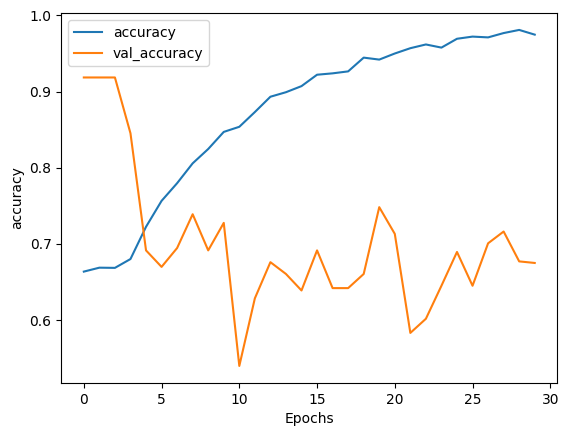

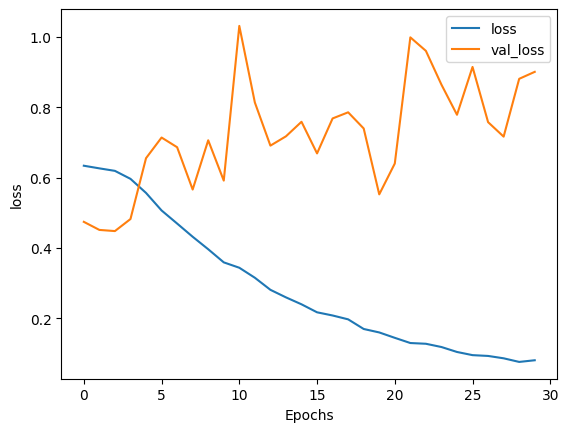

In [ ]:
# Plot Training and Validation Accuracy and Loss
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

From the above plots, it is evident that the model’s training accuracy steadily improved over the epochs, while validation accuracy showed variability. This may suggest that while the model is fitting well to the training data, it struggles to generalize. Such fluctuations are often mitigated through techniques like regularization, data augmentation or architecture adjustments.


In [ ]:
# Embedding Visualization
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Example sentence decoding
print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

technopolis plans to develop in stages an area of no less than 100 000 square meters in order to host companies working in computer technologies and telecommunications the statement said ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
1


The embedding layer transforms words into vectors that capture semantic relationships. By visualizing these embeddings, we can observe clusters of words that frequently appear together in optimistic or cautious contexts. Such visualization helps to understand how the model interprets financial language.


We proceed to save the embeddings in TSV format, which can be visualized using TensorFlow’s Embedding Projector. This visualization helps to assess how well the model’s embeddings capture semantic relationships, though OOV words remain unrepresented.


In [ ]:
# Saving Embeddings for Visualization
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)  # Should print: (vocab_size, embedding_dim)

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in reverse_word_index.keys():  # Loop only through existing word indices
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()


(10000, 16)


In [ ]:
# Downloading embedding files for visualization in projector
try:
    from google.colab import files
    files.download('vecs.tsv')
    files.download('meta.tsv')
except ImportError:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Predicting Sentiments for New Sentences
new_sentences = ["The stock market shows signs of recovery", "Investors are concerned about inflation rates"]
sequences = tokenizer.texts_to_sequences(new_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.45973635]
 [0.15309918]]


The predictions for sample sentences, with confidence values closer to 0 or 1, suggest the model’s judgment on sentiment. A prediction closer to 0 (like 0.04) indicates a high confidence in the “caution” category, while a prediction closer to 1 would signify “optimism.” These scores provide insights into how the model interprets financial sentiment, potentially aiding in market trend analysis.

While the model captures basic sentiment, it may struggle with nuanced phrases where financial sentiment isn’t explicit or relies on specific industry knowledge. Further model improvements could include context-aware architectures such as transformers to better handle complex language structures.



# 3. Generating text using RNNs (LSTMs)

In this section we shall attempt to build an LSTM model to generate realistic financial text based on Indian financial news headlines and descriptions. Using LSTMs is beneficial here because they can capture sequential patterns in the language, making the generated text sound coherent and contextually appropriate.

Before heading on to the same, we shall briefy try to understand the workings of RNNs or Recurrent Neural Networks and thereafter LSTMs or Long Short-Term Memory. Unlike regular neural networks used in classification and regression tasks, RNNs are designed to handle **sequential data**. In typical networks, data and labels are mapped directly without considering order, while **RNNs apply a sequence-based structure to input data, making previous outputs a crucial part of future computations**. Mathematically, RNNs operate by representing the data in a sequence, where the function
$f(data, labels) = rules$

inherently lacks sequence without modification.RNNs adapt by applying each data point iteratively, with each result influencing subsequent steps.

Data flow in an RNN can be explained as each computation in an RNN involving feeding the output from one neuron into the next neuron, retaining sequence memory. Mathematically:
Input $x_0$ yields output $y_0$ and a feed-forward value, passed along to be combined with $x_1$, generating $y_1$, and so on.

Standard RNNs face diminishing influence over long sequences; mathematically, distant inputs exert increasingly minimal impact as steps progress. This limitation becomes pronounced in tasks needing longer context memory, which motivates the shift to Long Short-Term Memory (LSTM) networks.

The core of LSTMs lies in the cell state and gates. There are 3 types of gates to control flow of information:

* Forget Gate: Decides what part of the previous information to forget.
* Input Gate: Determines which new information to store.
* Output Gate: Controls which information is passed to the next state.

By controlling what to retain and what to discard, LSTMs effectively manage context. In NLP tasks, this is crucial, as early words in a sentence can affect the meaning of words that come much later.

For certain tasks, understanding the context both before and after a word can enhance prediction accuracy. **Bi-directional LSTMs** address this by processing the sentence in both directions, capturing a richer context. For example, when interpreting sentiment, words following "not" are as important as those before it.

With the theory covered, we can start with the practical application.


####**3.1 Data Preparation**

We will load the financial news dataset (obtained from [Kaggle](https://www.kaggle.com/datasets/hkapoor/indian-financial-news-articles-20032020)) focusing on the Title and Description columns to create a corpus of financial text. Thereafter we shall proceed to pre-process the text by means of tokenization, filtering punctuations etc. and clean the text to ensure uniformity.

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Loading and preprocessing the dataset
file_path = 'IndianFinancialNews.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Combining title and description, converting to lowercase
data['text'] = data['Title'].astype(str) + " " + data['Description'].astype(str)
corpus = data['text'].str.lower().tolist()

# Tokenizing
vocab_size = 5000  # set depending on available memory
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Text to sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# # Padding for uniform length
# max_sequence_len = max([len(x) for x in input_sequences])
# input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create shorter sequences for input-output pairs
max_sequence_len = 30
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')


sample_size = 20000
indices = np.random.choice(len(input_sequences), sample_size, replace=False)
input_sequences = input_sequences[indices]

# Creating predictors and labels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = labels


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
xs_train, xs_val, ys_train, ys_val = train_test_split(xs, ys, test_size=0.2, random_state=42)

# Create tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((xs_train, ys_train)).batch(64).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((xs_val, ys_val)).batch(64).prefetch(tf.data.AUTOTUNE)


####**3.2 Building and Training the LSTM Model**

We make the following considerations when setting up the LSTM Model:

* **Embedding Layer:** Converts each word into a dense vector of fixed size, capturing semantic relationships between words.
* **Bidirectional LSTM Layer:** Allows the model to learn from both past and future contexts, enhancing its understanding of financial language patterns.
* **Dense Output Layer:** Outputs a probability distribution over the vocabulary, allowing the model to predict the next word.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
# Building the model
# Model with reduced embedding dimensions
embedding_dim = 64
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Create a tf.data dataset
dataset = tf.data.Dataset.from_tensor_slices((xs, ys)).batch(64).prefetch(tf.data.AUTOTUNE)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(
    train_dataset,
    validation_data=val_dataset,   # Use separate validation dataset
    epochs=50,                     # Starting with 30 epochs
    # callbacks=[early_stop],        # Add early stopping callback
    verbose=1
)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 116s 447ms/step - accuracy: 0.0513 - loss: 7.9419 - val_accuracy: 0.0510 - val_loss: 6.8372
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 136s 422ms/step - accuracy: 0.0570 - loss: 6.3410 - val_accuracy: 0.0622 - val_loss: 6.7879
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 112s 447ms/step - accuracy: 0.0714 - loss: 6.1860 - val_accuracy: 0.0817 - val_loss: 6.7881
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 419ms/step - accuracy: 0.0832 - loss: 6.0257 - val_accuracy: 0.0880 - val_loss: 6.8257
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 422ms/step - accuracy: 0.0922 - loss: 5.8768 - val_accuracy: 0.0940 - val_loss: 6.8224
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 422ms/step - accuracy: 0.1071 - loss: 5.6981 - val_accuracy: 0.0975 - val_loss: 6.8456
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 425ms/step - accuracy: 0.1189 - loss: 5.4926 - val_accuracy: 0.1047 - val_loss: 6.8258
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 110s 441ms/step - accuracy: 0.1296 -

####**3.3 Generating Financial Text**

With the trained model, we can now generate new financial commentary by providing a **seed text**. This generated text can simulate potential financial narratives, useful for analysis or exploration in financial contexts.


In [ ]:
import numpy as np

def generate_text(seed_text, next_words=50):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Example usage
seed_text = "The stock market is"
print(generate_text(seed_text, next_words=20))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The stock market is moderate by more growth in the foreign fiscal today asked to be down for the capital from the property reaction


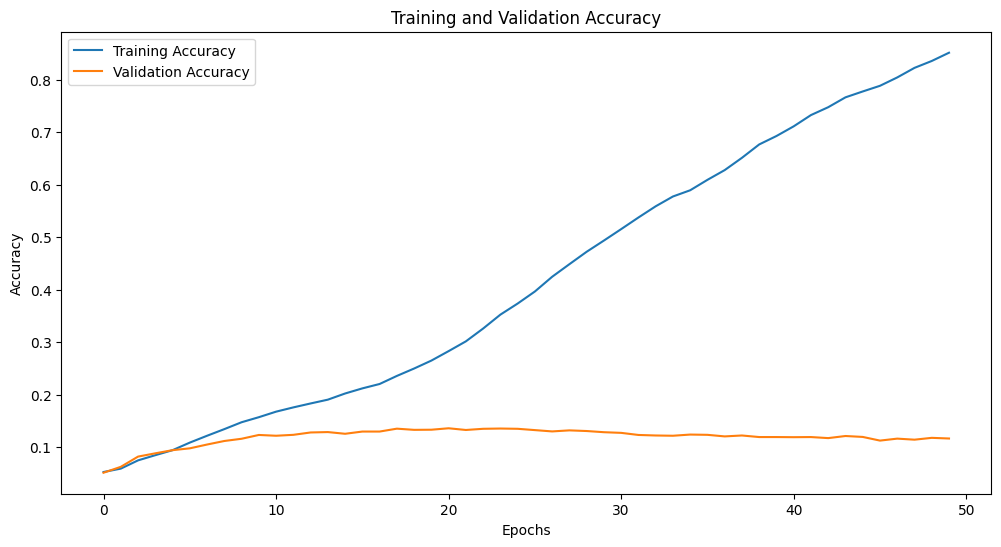

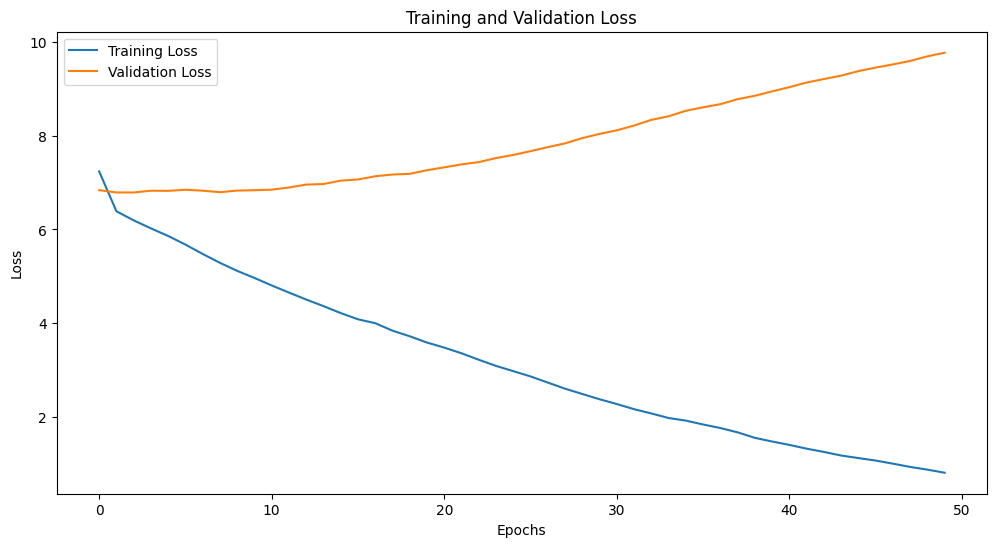

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


The above results and plots allow us to draw the following conclusions:

**Model Performance:**

* **Training Accuracy:** The model reached a training accuracy of 84.8%, suggesting it learned patterns from the training data effectively.
* **Validation Accuracy:** With validation accuracy around 11-13%, the model struggled to generalize, indicating overfitting. This suggests that while the model can memorize training sequences, it lacks the capacity to generate contextually meaningful financial phrases in new data.

Moreover, the generated sentence "The stock market is moderate by more growth in the foreign fiscal today asked to be down for the capital from the property reaction" captures some structural coherence but lacks clear financial relevance or depth.

This result is expected, given the model's limitations in generalizing meaningful financial language on limited data.

For further improvement, we would need to consider addressing overfitting with early stopping, regularization, or dropout layers, as also expanding the dataset with more diverse and contextually rich financial data, or using pre-trained embeddings like GloVe to improve contextual understanding. We can also explore transformer based models such as BERT for further refinement.

Overall, while this LSTM model demonstrates foundational text generation capabilities, there’s potential to enhance performance and contextual accuracy through advanced techniques and additional data.